In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler #No normales con outlier
from sklearn.preprocessing import StandardScaler #Normales
from sklearn.preprocessing import MinMaxScaler #No normales sin outlier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.image as mpimg
from sklearn.metrics import silhouette_score

In [105]:
facebook=pd.read_csv(r"C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\T8\Publicacions Facebook Thailandia.csv", encoding='utf-8', sep=",", header=None, engine="python")
pd.set_option('display.max_columns', 500)
facebook.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
1,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
2,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN


In [106]:
facebook.columns = facebook.iloc[0]

In [107]:
facebook= facebook.drop([0])

In [108]:
facebook.head(10)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
1,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
2,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
5,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
6,246675545449582_1645650162218773,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0,NaN,NaN,NaN,NaN
7,246675545449582_1645564175560705,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3,NaN,NaN,NaN,NaN
8,246675545449582_1644824665634656,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1,NaN,NaN,NaN,NaN
9,246675545449582_1644655795651543,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0,NaN,NaN,NaN,NaN
10,246675545449582_1638788379571618,photo,4/11/2018 4:53,170,9,1,167,3,0,0,0,0,NaN,NaN,NaN,NaN


Facebook es un conjunto de datos que nos muestra: 
- status_id:  podría ser un número único e identificador de cada publicacion.
- status_type: Tipo de contenido que se ha publicado. 
- status_published: Fecha y hora en que se hizo la publicación.
- num_reactions: Numero de, reacciones.
- num_comments: Numero de comentarios.
- num_shares: Numero de compartidos.
- num_likes: Numero de, likes.
- num_loves: Numero de, me gusta.
- num_wows:  Numero de, wows
- num_hahas: Numero de, me divierte.
- num_sads: Numero de, me entristece. 
- num_angrys: Numero de, me enfurece.
- Column1: sin información
- Column2: sin información
- Column3: sin información
- Column4: sin información

In [109]:
facebook.shape

(7050, 16)

In [110]:
facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 1 to 7050
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   object
 4   num_comments      7050 non-null   object
 5   num_shares        7050 non-null   object
 6   num_likes         7050 non-null   object
 7   num_loves         7050 non-null   object
 8   num_wows          7050 non-null   object
 9   num_hahas         7050 non-null   object
 10  num_sads          7050 non-null   object
 11  num_angrys        7050 non-null   object
 12  Column1           0 non-null      object
 13  Column2           0 non-null      object
 14  Column3           0 non-null      object
 15  Column4           0 non-null      object
dtypes: object(16)
memory usage: 881.4+ KB


In [111]:
facebook.duplicated().sum()

51

In [112]:
duplicados = facebook[facebook.duplicated()]
print("Datos duplicados:")
duplicados.head(10)

Datos duplicados:


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
6222,819700534875473_1002372733274918,video,6/10/2018 3:43,376,20,3,354,19,3,0,0,0,NaN,NaN,NaN,NaN
6223,819700534875473_1001982519980606,photo,6/9/2018 22:53,255,7,4,249,6,0,0,0,0,NaN,NaN,NaN,NaN
6224,819700534875473_1000607730118085,photo,6/7/2018 7:01,1704,21,3,1685,15,2,2,0,0,NaN,NaN,NaN,NaN
6225,819700534875473_999880033524188,status,6/6/2018 2:20,205,39,4,197,4,4,0,0,0,NaN,NaN,NaN,NaN
6226,819700534875473_998824716963053,photo,6/4/2018 6:57,336,42,2,285,5,0,0,46,0,NaN,NaN,NaN,NaN
6227,819700534875473_997075427137982,status,6/1/2018 0:35,111,2,1,110,1,0,0,0,0,NaN,NaN,NaN,NaN
6228,819700534875473_995933077252217,photo,5/30/2018 6:33,357,18,9,352,3,1,1,0,0,NaN,NaN,NaN,NaN
6229,819700534875473_995839410594917,photo,5/30/2018 2:39,114,7,0,109,3,2,0,0,0,NaN,NaN,NaN,NaN
6230,819700534875473_995218893990302,status,5/29/2018 4:39,133,7,1,127,6,0,0,0,0,NaN,NaN,NaN,NaN
6231,819700534875473_993975437447981,photo,5/27/2018 1:31,532,32,4,480,47,5,0,0,0,NaN,NaN,NaN,NaN


In [113]:
duplicados['status_id'].value_counts()

819700534875473_1002372733274918    1
819700534875473_962032993975559     1
819700534875473_966878030157722     1
819700534875473_966629653515893     1
819700534875473_966156923563166     1
819700534875473_965614580284067     1
819700534875473_965407870304738     1
819700534875473_964582740387251     1
819700534875473_963754250470100     1
819700534875473_962799373898921     1
819700534875473_962694150576110     1
819700534875473_962061653972693     1
819700534875473_960466324132226     1
819700534875473_968264653352393     1
819700534875473_960320564146802     1
819700534875473_958291217683070     1
819700534875473_957697307742461     1
819700534875473_957599447752247     1
819700534875473_956769714501887     1
819700534875473_955793427932849     1
819700534875473_955743124604546     1
819700534875473_955149101330615     1
819700534875473_954387151406810     1
819700534875473_953048221540703     1
819700534875473_967787160066809     1
819700534875473_971940472984811     1
819700534875

In [114]:
facebook = facebook.drop_duplicates()
facebook

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
1,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
2,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
5,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7046,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7049,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [115]:
facebook.isnull().sum()

0
status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             6999
Column2             6999
Column3             6999
Column4             6999
dtype: int64

identifico que columnas tienen datos nullos.

In [116]:
facebook= facebook.dropna(axis=1)
facebook

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
1,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
2,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
3,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
4,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
5,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7046,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7047,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7048,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7049,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


Eliminamos las columnas con Nullos por que todos los datos estan vacios, son columnas no relevantes para nuestro conjunto de datos.

Se puede identificar que la columna num_reactions es la suma de : num_likes, num_loves, num_wows, num_hahas, num_sads, num_angrys.

In [117]:
columnas_numericas = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
facebook[columnas_numericas] = facebook[columnas_numericas].apply(pd.to_numeric, errors='coerce')
print(facebook.dtypes)

0
status_id           object
status_type         object
status_published    object
num_reactions        int64
num_comments         int64
num_shares           int64
num_likes            int64
num_loves            int64
num_wows             int64
num_hahas            int64
num_sads             int64
num_angrys           int64
dtype: object


C:\Users\dpino\AppData\Local\Temp\ipykernel_18212\168622415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facebook[columnas_numericas] = facebook[columnas_numericas].apply(pd.to_numeric, errors='coerce')


In [118]:
facebook.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 7050
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         6999 non-null   object
 1   status_type       6999 non-null   object
 2   status_published  6999 non-null   object
 3   num_reactions     6999 non-null   int64 
 4   num_comments      6999 non-null   int64 
 5   num_shares        6999 non-null   int64 
 6   num_likes         6999 non-null   int64 
 7   num_loves         6999 non-null   int64 
 8   num_wows          6999 non-null   int64 
 9   num_hahas         6999 non-null   int64 
 10  num_sads          6999 non-null   int64 
 11  num_angrys        6999 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 710.8+ KB


Convertimos las columnas de tipo object a numerico. para poder analizarlos estadisitca y graficamente. 

In [119]:
facebook2=facebook.copy()

Hago una copia de facebook, para comprobar si la suma 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys' es igual a 'suma_reacciones'.

In [120]:
facebook2['suma_reacciones'] = facebook2['num_likes'] + facebook2['num_loves'] + facebook2['num_wows'] + facebook2['num_hahas'] + facebook2['num_sads'] + facebook2['num_angrys']

Comprobamos si 'num_reactions' es la suma de las columnas (num_likes, num_loves, num_wows, num_hahas, num_sads, num_angrys), agregando una columna con la suma de esta y luego vamos a conprobar los resultados.

In [121]:
facebook2['comprobacion'] = facebook2['num_reactions'] == facebook2['suma_reacciones']
facebook2

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,suma_reacciones,comprobacion
1,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,529,True
2,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,150,True
3,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,227,True
4,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,111,True
5,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,213,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7046,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,89,True
7047,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,16,True
7048,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,2,True
7049,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,351,True


In [122]:
comprobacion_false = facebook2[facebook2['comprobacion'] == False]
comprobacion_false

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,suma_reacciones,comprobacion
239,246675545449582_1331955210254938,video,6/25/2017 7:42,885,462,26,659,220,0,2,0,0,881,False
248,246675545449582_1320853268031799,photo,6/13/2017 23:17,264,2,0,256,2,5,0,0,0,263,False
249,246675545449582_1319907678126358,photo,6/13/2017 1:31,313,3,0,297,7,6,0,0,0,310,False
252,246675545449582_1319045328212593,photo,6/12/2017 5:08,247,6,0,234,9,1,0,0,0,244,False
254,246675545449582_1318160668301059,photo,6/11/2017 7:04,387,3,0,368,16,1,0,0,0,385,False
255,246675545449582_1317164368400689,photo,6/10/2017 8:19,178,9,0,170,6,0,0,0,0,176,False
257,246675545449582_1316848781765581,photo,6/10/2017 1:08,270,3,0,256,10,3,0,0,0,269,False
258,246675545449582_1315331711917288,photo,6/8/2017 9:26,351,4,1,344,6,0,0,0,0,350,False
294,246675545449582_1262985247151935,video,4/20/2017 2:36,616,523,21,459,125,21,8,0,1,614,False


podemos comprobar que num_reactions no es el resultado de la suma de: (num_likes, num_loves, num_wows, num_hahas, num_sads, num_angrys), para todas las filas. asi que seguimos usando nuestro conjunto de datos original facebook.

######  Variables numericas:

In [123]:
facebook[columnas_numericas]

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
1,529,512,262,432,92,3,1,1,0
2,150,0,0,150,0,0,0,0,0
3,227,236,57,204,21,1,1,0,0
4,111,0,0,111,0,0,0,0,0
5,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7046,89,0,0,89,0,0,0,0,0
7047,16,0,0,14,1,0,1,0,0
7048,2,0,0,1,1,0,0,0,0
7049,351,12,22,349,2,0,0,0,0


In [124]:
facebook[columnas_numericas].describe().round(3)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6999.000,6999.000,6999.000,6999.000,6999.000,6999.000,6999.000,6999.000,6999.000
mean,224.995,225.552,40.259,209.947,12.752,1.253,0.698,0.233,0.110
std,452.881,892.743,132.047,439.550,40.107,8.726,3.971,1.481,0.689
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,17.000,0.000,0.000,17.000,0.000,0.000,0.000,0.000,0.000
50%,58.000,4.000,0.000,57.000,0.000,0.000,0.000,0.000,0.000
75%,216.000,22.000,4.000,182.000,3.000,0.000,0.000,0.000,0.000
max,4710.000,20990.000,3424.000,4710.000,657.000,278.000,157.000,51.000,31.000


Analisis estadistico: 
- num_reactions: Tiene una media de 224.995, una desviacion estandar de 452.881 y un maximo de: 4.710.000 
- num_comments: Tiene una media de 225.552, una desviacion estandar de 892.743 y un maximo de: 20.990.000
- num_shares:  Tiene una media de 40.259, una desviacion estandar de 132.047	 y un maximo de: 3424.000
- num_likes: Tiene una media de 209.947, una desviacion estandar de 439.550 y un maximo de: 4.710.000 (los datos estan concentrados en el 50% de los registros)
- num_loves: Tiene una media de 12.752, una desviacion estandar de 40.107 y un maximo de: 657.000 (los datos estan concentrados en el 50% de los registros)	
- num_wows: Tiene una media de 1.253, una desviacion estandar de 8.726 y un maximo de: 278.000 (los datos estan concentrados en el 25% de los registros)
- num_hahas: Tiene una media de 0.698, una desviacion estandar de 3.971 y un maximo de: 157.000 (los datos estan concentrados en el 25% de los registros)
- num_sads: Tiene una media de 0.233, una desviacion estandar de 1.481 y un maximo de: 51.000 (los datos estan concentrados en el 25% de los registros)
- num_angrys: Tiene una media de 0.110, una desviacion estandar de 0.689 y un maximo de: 31.000 (los datos estan concentrados en el 25% de los registros)

In [125]:
facebook[columnas_numericas].sum()

0
num_reactions    1574737
num_comments     1578639
num_shares        281770
num_likes        1469417
num_loves          89248
num_wows            8769
num_hahas           4885
num_sads            1628
num_angrys           771
dtype: int64

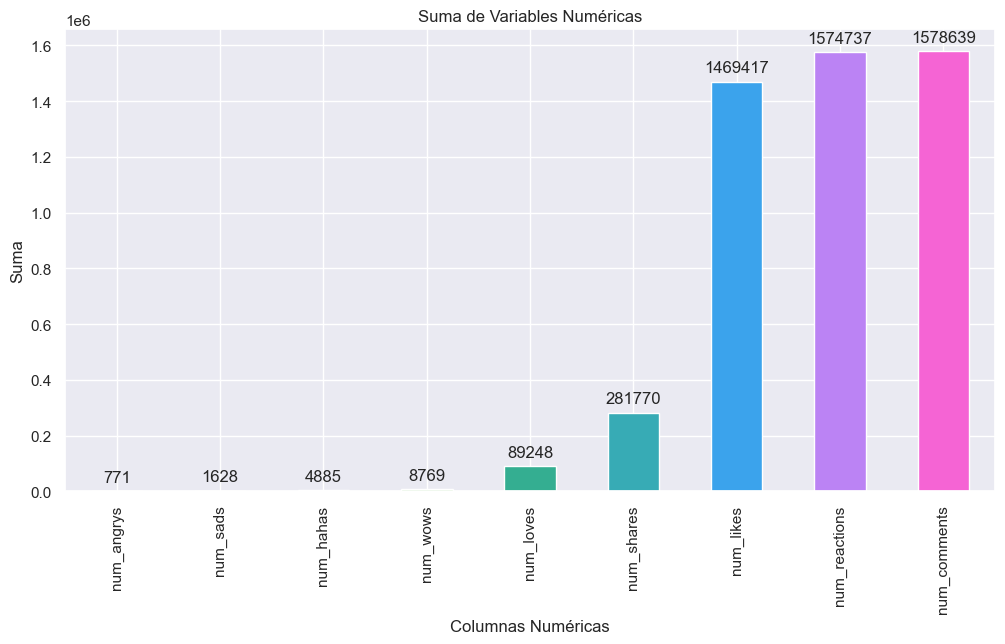

In [126]:
suma_total= facebook[columnas_numericas].sum()
colores = sns.color_palette("husl", len(suma_total))
plt.figure(figsize=(12, 6))
ax = suma_total.sort_values().plot(kind='bar', color=colores)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Suma de Variables Numéricas')
plt.xlabel('Columnas Numéricas')
plt.ylabel('Suma')
plt.show()

En esta grafica podemos ver los totales para cada columna, vemos que hay grandes diferencias entre las columnas, la menor es, num_angrys con 771 reacciones y num_sads con 1628. lo cual significa que pocas personas reaccionaron de esta forma ante las publicaciones (las reacciones negativas tuvieron menos reacciones). mientras que la interacción que mas se generaró fue num_reaction tiene un total de 1.574.737 y la variabel num_commments tienen un total de 1.578.639.

###### Variables categoricas: 

In [127]:
facebook[['status_id', 'status_type', 'status_published']]

,status_id,status_type,status_published
1,246675545449582_1649696485147474,video,4/22/2018 6:00
2,246675545449582_1649426988507757,photo,4/21/2018 22:45
3,246675545449582_1648730588577397,video,4/21/2018 6:17
4,246675545449582_1648576705259452,photo,4/21/2018 2:29
5,246675545449582_1645700502213739,photo,4/18/2018 3:22
...,...,...,...
7046,1050855161656896_1061863470556065,photo,9/24/2016 2:58
7047,1050855161656896_1061334757275603,photo,9/23/2016 11:19
7048,1050855161656896_1060126464063099,photo,9/21/2016 23:03
7049,1050855161656896_1058663487542730,photo,9/20/2016 0:43


Status_id: es una variable que identifica a cada interaccion, por tanto cada registro es unico y status_published es una variable que nos muestra fecha y hora en que se realizo la publicacion.

In [128]:
facebook['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

Para la variable categorica status_type, los valores unicos que existen son 4, 'video', 'photo', 'link', 'status'

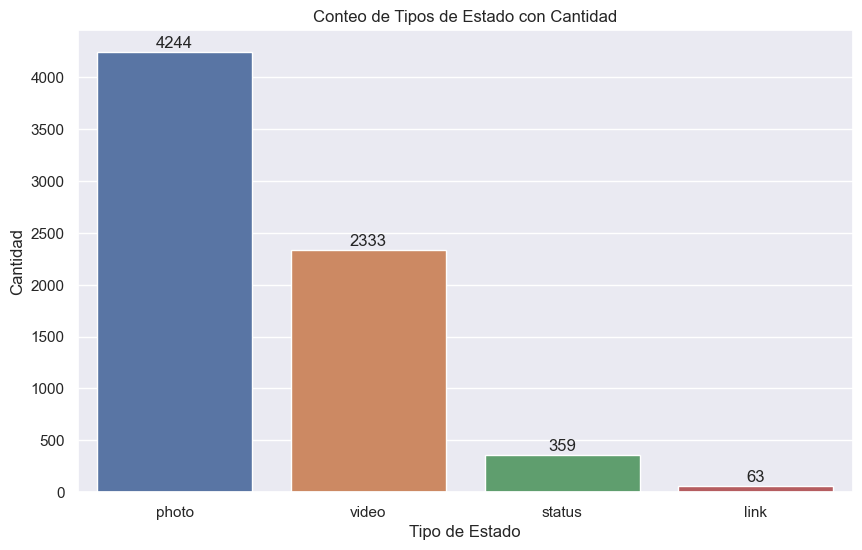

In [129]:
conteo_status_type = facebook['status_type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_status_type.index, y=conteo_status_type.values)
for index, value in enumerate(conteo_status_type.values):
    plt.text(index, value + 10, str(value), ha='center', va='bottom')

plt.title('Conteo de Tipos de Estado con Cantidad')
plt.xlabel('Tipo de Estado')
plt.ylabel('Cantidad')
plt.show()

Para status_type, vemos aque existen cuatro categorias:
- Photo: 4244 (la mayoria de interacciones fueron fotos)
- video: 2333
- status: 359
- link: 63 (pocas interacciones se hicieron con links)

### EDA ( Exploratory Data Analysis )

In [130]:
facebook[columnas_numericas].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 7050
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   num_reactions  6999 non-null   int64
 1   num_comments   6999 non-null   int64
 2   num_shares     6999 non-null   int64
 3   num_likes      6999 non-null   int64
 4   num_loves      6999 non-null   int64
 5   num_wows       6999 non-null   int64
 6   num_hahas      6999 non-null   int64
 7   num_sads       6999 non-null   int64
 8   num_angrys     6999 non-null   int64
dtypes: int64(9)
memory usage: 546.8 KB


Con las columnas numericas de nuestro conjunto de datos Facebook, vamos a aplicar el test de normalidad shapiro, para determinar si son o no normales.

######  Variables numericas:

In [131]:
from scipy.stats import shapiro
for x in facebook[columnas_numericas]:
    stat, p = shapiro(facebook[columnas_numericas])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

stat=0.197, p=0.000
Probably not Gaussian
stat=0.197, p=0.000
Probably not Gaussian
stat=0.197, p=0.000
Probably not Gaussian
stat=0.197, p=0.000
Probably not Gaussian
stat=0.197, p=0.000
Probably not Gaussian
stat=0.197, p=0.000
Probably not Gaussian
stat=0.197, p=0.000
Probably not Gaussian
stat=0.197, p=0.000
Probably not Gaussian
stat=0.197, p=0.000
Probably not Gaussian


C:\Users\dpino\AppData\Local\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\dpino\AppData\Local\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\dpino\AppData\Local\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\dpino\AppData\Local\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\dpino\AppData\Local\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be 

Todas las variables numericas no son normales. vamos a sustentarlo con las graficas boxplot, para saber ademas si tienen o no outliers.

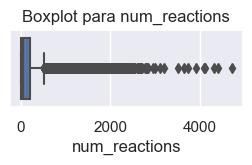

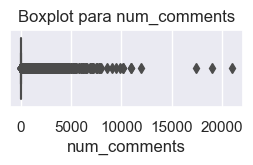

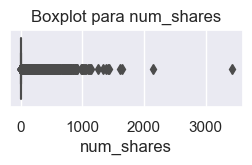

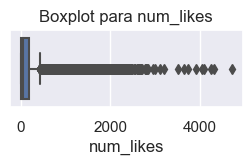

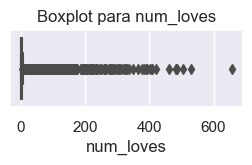

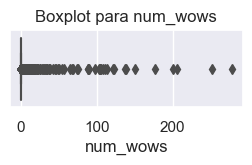

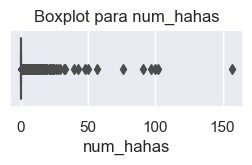

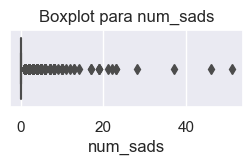

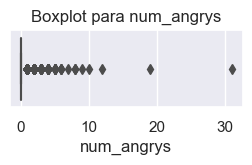

In [132]:
for i in facebook[columnas_numericas]:
    plt.figure(figsize=(3, 1))
    sns.set()
    sns.boxplot(x=facebook[i])
    plt.title(f'Boxplot para {i}')
    plt.show()

Concluimos que las variables 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', no son normales y tienen ouliers. por tanto tranformamos con RobustScaler, todas las variables.

In [133]:
robust_scaler = RobustScaler()
facebook[columnas_numericas] = robust_scaler.fit_transform(facebook[columnas_numericas])
facebook

C:\Users\dpino\AppData\Local\Temp\ipykernel_18212\3942960930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facebook[columnas_numericas] = robust_scaler.fit_transform(facebook[columnas_numericas])


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
1,246675545449582_1649696485147474,video,4/22/2018 6:00,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0
2,246675545449582_1649426988507757,photo,4/21/2018 22:45,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0
3,246675545449582_1648730588577397,video,4/21/2018 6:17,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0
4,246675545449582_1648576705259452,photo,4/21/2018 2:29,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0
5,246675545449582_1645700502213739,photo,4/18/2018 3:22,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7046,1050855161656896_1061863470556065,photo,9/24/2016 2:58,0.155779,-0.181818,0.00,0.193939,0.000000,0.0,0.0,0.0,0.0
7047,1050855161656896_1061334757275603,photo,9/23/2016 11:19,-0.211055,-0.181818,0.00,-0.260606,0.333333,0.0,1.0,0.0,0.0
7048,1050855161656896_1060126464063099,photo,9/21/2016 23:03,-0.281407,-0.181818,0.00,-0.339394,0.333333,0.0,0.0,0.0,0.0
7049,1050855161656896_1058663487542730,photo,9/20/2016 0:43,1.472362,0.363636,5.50,1.769697,0.666667,0.0,0.0,0.0,0.0


Las columnas numericas han sido transformadas y escaladas. vemos que ahora los rangos son mas pequeños y aparecen numeros negativos.

In [134]:
dumm_fbk = pd.get_dummies(facebook.status_type, prefix="status_type", drop_first=True)
dumm_fbk

,status_type_photo,status_type_status,status_type_video
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
5,1,0,0
...,...,...,...
7046,1,0,0
7047,1,0,0
7048,1,0,0
7049,1,0,0


Realizamos Dummies a la variable catergorica status_type, nuestro resultado son tres columnas clasificadoras binarias.

In [135]:
facebook['status_published'] = pd.to_datetime(facebook['status_published'])
facebook['hora'] = facebook['status_published'].dt.hour
facebook

C:\Users\dpino\AppData\Local\Temp\ipykernel_18212\4064461772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facebook['status_published'] = pd.to_datetime(facebook['status_published'])
C:\Users\dpino\AppData\Local\Temp\ipykernel_18212\4064461772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facebook['hora'] = facebook['status_published'].dt.hour


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,hora
1,246675545449582_1649696485147474,video,2018-04-22 06:00:00,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,6
2,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,22
3,246675545449582_1648730588577397,video,2018-04-21 06:17:00,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,6
4,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,2
5,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7046,1050855161656896_1061863470556065,photo,2016-09-24 02:58:00,0.155779,-0.181818,0.00,0.193939,0.000000,0.0,0.0,0.0,0.0,2
7047,1050855161656896_1061334757275603,photo,2016-09-23 11:19:00,-0.211055,-0.181818,0.00,-0.260606,0.333333,0.0,1.0,0.0,0.0,11
7048,1050855161656896_1060126464063099,photo,2016-09-21 23:03:00,-0.281407,-0.181818,0.00,-0.339394,0.333333,0.0,0.0,0.0,0.0,23
7049,1050855161656896_1058663487542730,photo,2016-09-20 00:43:00,1.472362,0.363636,5.50,1.769697,0.666667,0.0,0.0,0.0,0.0,0


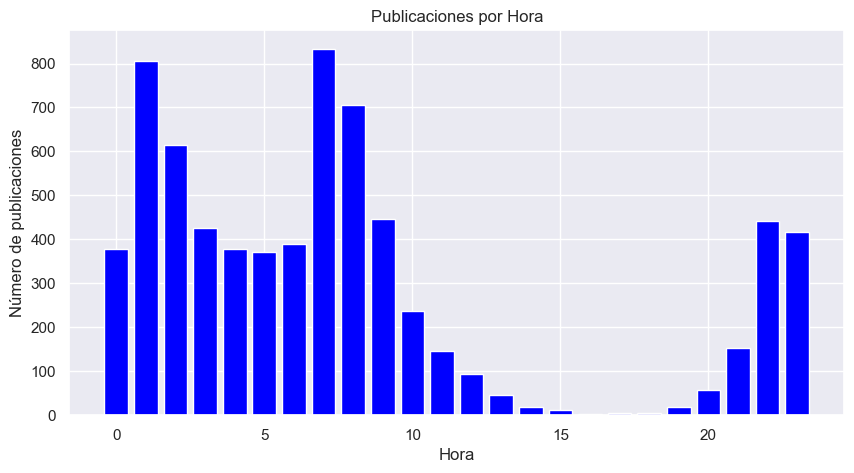

In [136]:
df = pd.DataFrame(facebook)

hora = facebook['hora'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(hora.index, hora.values, color='blue')
plt.xlabel('Hora')
plt.ylabel('Número de publicaciones')
plt.title('Publicaciones por Hora')
plt.show()

En esta grafica, observamos:
- las horas en que se hicieron estas publicaciones, la mayoria de publicaciones se hicieron a la 1h (800), 2h (600), 7h(810) y 8h (700), mientras aque en la tarde - noche, disminuyeron estas publicaciones. las horas que mas publicaciones se hicieron fueron a las 22 h (420) y 23h (410).

me parece interesante saber en que momento del dia se realizaron estas publicaciones y mantener esta informacion en mi conjunto de datos.

In [137]:
fbk1=facebook.drop("status_id",axis=1)
fbk1=fbk1.drop("status_published",axis=1)
fbk1

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,hora
1,video,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,6
2,photo,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,22
3,video,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,6
4,photo,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,2
5,photo,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...
7046,photo,0.155779,-0.181818,0.00,0.193939,0.000000,0.0,0.0,0.0,0.0,2
7047,photo,-0.211055,-0.181818,0.00,-0.260606,0.333333,0.0,1.0,0.0,0.0,11
7048,photo,-0.281407,-0.181818,0.00,-0.339394,0.333333,0.0,0.0,0.0,0.0,23
7049,photo,1.472362,0.363636,5.50,1.769697,0.666667,0.0,0.0,0.0,0.0,0


Ahora que he extraido la informacion que me parece relevante, continuo a eliminar variables que no me aportan infomacioón relevante desde mi percepción, en este caso son: status_id y status_published ( de la cula me quedo solo cn la hora).

In [138]:
def asignar_categoria(hora):
    if 6 <= hora < 12:
        return "mañana"
    elif 12 <= hora < 18:
        return "tarde"
    return "noche"

fbk1['momento del dia'] = fbk1['hora'].apply(asignar_categoria)

con un ciclo for ahora clasifico la columna hora, para saber el momento del dia en una nueva columna, y asi crear una variable categorica, luego procedo a eliminar la columna hora.

In [139]:
fbk1=fbk1.drop("hora",axis=1)
fbk1

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,momento del dia
1,video,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,mañana
2,photo,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,noche
3,video,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,mañana
4,photo,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,noche
5,photo,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,noche
...,...,...,...,...,...,...,...,...,...,...,...
7046,photo,0.155779,-0.181818,0.00,0.193939,0.000000,0.0,0.0,0.0,0.0,noche
7047,photo,-0.211055,-0.181818,0.00,-0.260606,0.333333,0.0,1.0,0.0,0.0,mañana
7048,photo,-0.281407,-0.181818,0.00,-0.339394,0.333333,0.0,0.0,0.0,0.0,noche
7049,photo,1.472362,0.363636,5.50,1.769697,0.666667,0.0,0.0,0.0,0.0,noche


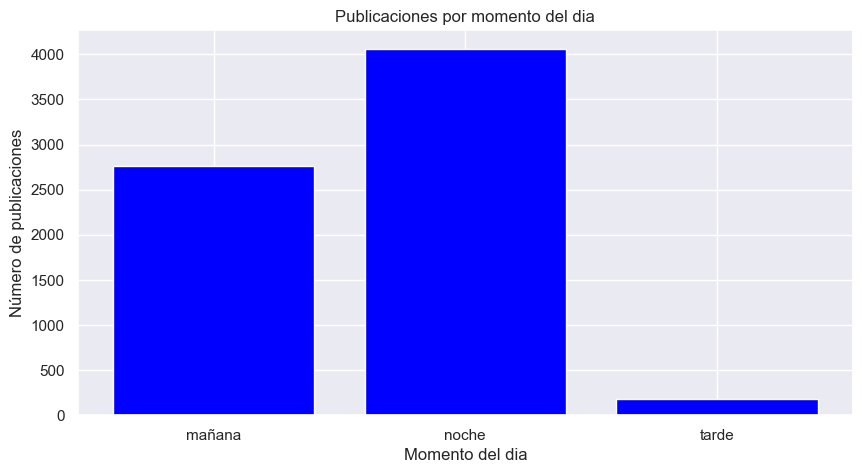

In [140]:
hora = fbk1['momento del dia'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(hora.index, hora.values, color='blue')
plt.xlabel('Momento del dia')
plt.ylabel('Número de publicaciones')
plt.title('Publicaciones por momento del dia')
plt.show()

Se puede observar que el momento del dia en que mas se hicieron las publicaciones fue en la noche. 

Esta variable ahora que la considero categorica,  necesito volverla numerica y esto lo hare con un dummy.

In [141]:
dummies_dia = pd.get_dummies(fbk1['momento del dia'], prefix='momento_dia')
dummies_dia

,momento_dia_mañana,momento_dia_noche,momento_dia_tarde
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0
5,0,1,0
...,...,...,...
7046,0,1,0
7047,1,0,0
7048,0,1,0
7049,0,1,0


#### El Análisis de Componentes Principales (PCA) 

PCA (Análisis de Componentes Principales, por sus siglas en inglés) es una técnica de reducción de dimensionalidad utilizada en el análisis de datos y el aprendizaje automático. Su objetivo principal es transformar un conjunto de variables correlacionadas en un conjunto de variables no correlacionadas llamadas componentes principales. Estos componentes principales son combinaciones lineales de las variables originales y están ordenados de manera que el primero captura la mayor varianza en los datos, el segundo captura la segunda mayor varianza, y así sucesivamente.

In [142]:
pca = PCA()
componentes_principales = pca.fit_transform(facebook[columnas_numericas])

aplicamos el PCA  a nuestor conjunto de datos numericos, para reducir su dimencionalidad, mientras mantiene la distribucion de los valores del conjunto de datos original. 

In [143]:
varianza_explicada_ratio = pca.explained_variance_ratio_
varianza_explicada_ratio

array([7.84337406e-01, 1.70025075e-01, 2.43677715e-02, 1.30587924e-02,
       3.73572126e-03, 3.67530881e-03, 6.68379165e-04, 1.31545205e-04,
       3.43318848e-11])

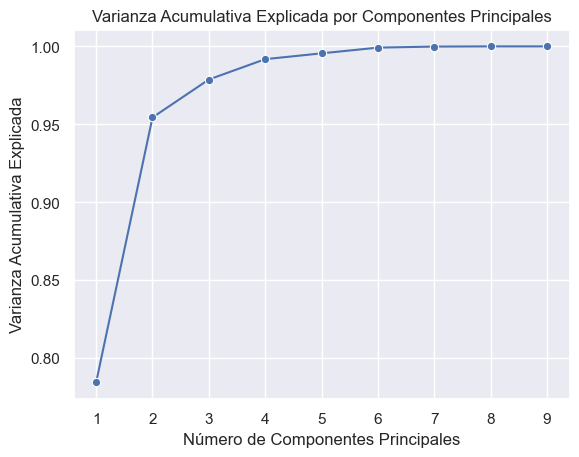

In [144]:
varianza_acumulativa = varianza_explicada_ratio.cumsum()
sns.lineplot(x=range(1, len(varianza_acumulativa) + 1), y=varianza_acumulativa, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulativa Explicada')
plt.title('Varianza Acumulativa Explicada por Componentes Principales')
plt.show()

Con la grafica de varianza acumulativa explicada de componentes principales, podemos identificar que con tres componentes explicamos aproximadamente el 97% del conjunto total. por tanto escojo este porcentaje para realizar la PCA.

In [145]:
pca=PCA(0.97)

In [146]:
df_pca = pd.DataFrame(pca.fit_transform(facebook[columnas_numericas]), columns=['PC1', 'PC2', 'PC3'], index=facebook.index)
df_pca

,PC1,PC2,PC3
1,48.141927,39.279885,-1.810818
2,-14.873807,-2.241151,-0.564765
3,3.371249,3.438150,-0.012092
4,-14.877890,-2.247779,-0.587971
5,-14.268106,-1.394616,1.128641
...,...,...,...
7046,-14.880194,-2.251517,-0.601062
7047,-14.788323,-2.142925,-0.329232
7048,-14.822736,-2.173432,-0.468840
7049,-11.064314,1.577548,-1.892919


In [147]:
fbk=pd.concat([df_pca, dumm_fbk, dummies_dia], axis=1)
fbk

,PC1,PC2,PC3,status_type_photo,status_type_status,status_type_video,momento_dia_mañana,momento_dia_noche,momento_dia_tarde
1,48.141927,39.279885,-1.810818,0,0,1,1,0,0
2,-14.873807,-2.241151,-0.564765,1,0,0,0,1,0
3,3.371249,3.438150,-0.012092,0,0,1,1,0,0
4,-14.877890,-2.247779,-0.587971,1,0,0,0,1,0
5,-14.268106,-1.394616,1.128641,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
7046,-14.880194,-2.251517,-0.601062,1,0,0,0,1,0
7047,-14.788323,-2.142925,-0.329232,1,0,0,1,0,0
7048,-14.822736,-2.173432,-0.468840,1,0,0,0,1,0
7049,-11.064314,1.577548,-1.892919,1,0,0,0,1,0


Ahora que tengo el PCA de las variables numericas de mi conjunto de datos y los dummys de las variables categoricas, los concateno para tener un nuevo conjunto de datos transformado.

#### Ejercicio 1
Descarga el dataset adjunto, de registros de publicaciones en Facebook sobre Tailandia, y clasifica los diferentes registros utilizando el algoritmo de K-means.

#### MODELOS - Clusters

###### Metodo del codo:

C:\Users\dpino\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dpino\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dpino\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dpino\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


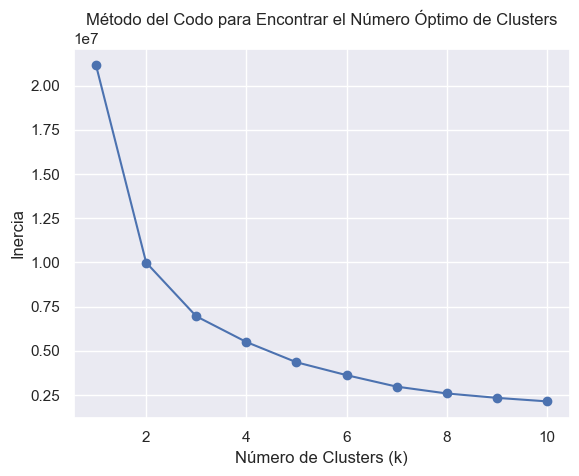

In [148]:
inertia_values = []
for k in range(1, 11):  # Puedes ajustar el rango según tus necesidades
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(facebook[columnas_numericas])
    inertia_values.append(kmeans_model.inertia_)

plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Método del Codo para Encontrar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.show()

Aplicamos el metodo el codo para hallar el numero de cluster optimo y nos da como resultado, que el numero de cluster optimo es 3. El 3 el el numero de cluster donde quiebra la inercia, para empezar a estabilizarse, generalmente se escoge el punto siguiente al mayor quiebre, en la disminucion de la inercia, en este caso el mayor quiebre fue en 2, pero el siguiente punto de quiebre en la disminucion es el 3, por esto lo he escogido.

#### MODELO K-MEANS

In [149]:
k = 3
kmeans_model = KMeans(n_clusters=k, random_state=42)
kmeans_model.fit(fbk)

C:\Users\dpino\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

Creo y entreno mi modelo con mi conjunot de datso tranformado.

In [150]:
facebook2['momento del dia'] = fbk1['momento del dia']

Traigo la columna 'momento del dia' que considero importante al conjunto de datos original desde el conjunto de datos tranformado que la contiene. con el fin de consolidar la información.

In [151]:
facebook2=facebook2.drop("status_published",axis=1)
facebook2=facebook2.drop("comprobacion",axis=1)
facebook2=facebook2.drop("suma_reacciones",axis=1)

Elimino de mi conjunto de datos original las columnas que considero no me aportan mas informacion relevante.

In [152]:
facebook2['clusters'] = kmeans_model.labels_
facebook2

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,momento del dia,clusters
1,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0,mañana,2
2,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,noche,0
3,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0,mañana,0
4,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0,noche,0
5,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0,noche,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7046,1050855161656896_1061863470556065,photo,89,0,0,89,0,0,0,0,0,noche,0
7047,1050855161656896_1061334757275603,photo,16,0,0,14,1,0,1,0,0,mañana,0
7048,1050855161656896_1060126464063099,photo,2,0,0,1,1,0,0,0,0,noche,0
7049,1050855161656896_1058663487542730,photo,351,12,22,349,2,0,0,0,0,noche,0


Debo aplicar las etiquetas generadas por mi modelo, a mi conjunto de datos original, por tanto creo una columna 'clusters', con las predicciones.

In [153]:
print(facebook2['clusters'].value_counts())
print(f'\nSSE: {kmeans_model.inertia_}')
print(f'\nCentroides: {kmeans_model.cluster_centers_}')
print(f'\nInteraciones hasta la convergencia: {kmeans_model.n_iter_}')

0    6452
2     475
1      72
Name: clusters, dtype: int64

SSE: 6528415.830376206

Centroides: [[-1.11041455e+01 -1.20779326e+00 -2.20722048e-02  6.57315561e-01
   5.56416615e-02  2.77278363e-01  3.76937384e-01  5.97024179e-01
   2.60384377e-02]
 [ 3.35027131e+02 -5.69672338e+01 -6.74628448e+00  1.38888889e-02
   1.38777878e-17  9.86111111e-01  7.91666667e-01  2.08333333e-01
   1.38777878e-17]
 [ 1.00046302e+02  2.50406799e+01  1.32240494e+00  4.21052632e-03
   4.85722573e-17  9.95789474e-01  5.68421053e-01  4.14736842e-01
   1.68421053e-02]]

Interaciones hasta la convergencia: 17


Vemos los principales aspectos de mis clusters, de cuantos registros se conforman y los centroides.

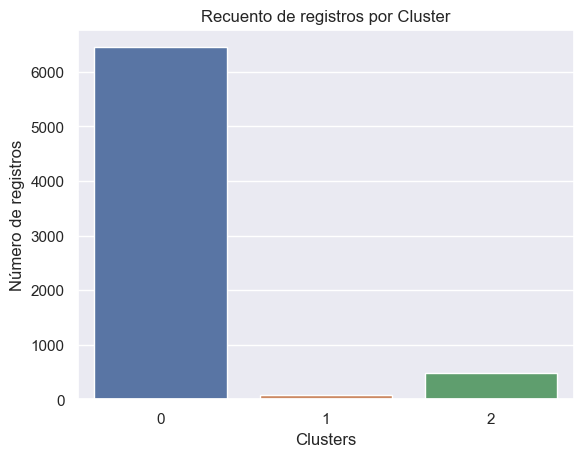

In [202]:
cluster = facebook2['clusters'].value_counts()
cluster_df = cluster.reset_index()
cluster_df.columns = ['Cluster', 'Número de registros']

sns.barplot(x='Cluster', y='Número de registros', data=cluster_df)

plt.xlabel('Clusters')
plt.ylabel('Número de registros')
plt.title('Recuento de registros por Cluster')
plt.savefig('Recuento de registros por cluster K-means.png')
plt.show()

Se puede observar que el cluster 1 contiene el mayor numero de observaciones, el cluster 0, agrupó la mayoria de datos. los cluster 1 y 2, agruparon muy pocas observaciones.

##### Que contiene cada cluster?

In [174]:
facebook2[facebook2['clusters'] == 0].head(5)

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,momento del dia,clusters
2,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,noche,0
3,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0,mañana,0
4,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0,noche,0
5,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0,noche,0
6,246675545449582_1645650162218773,photo,217,6,0,211,5,1,0,0,0,noche,0


He filtrado el conjunto de datos original para ver cada cluster en mi dataframe, sin embargo para mas facil comprensión lo voy a ver graficamente.

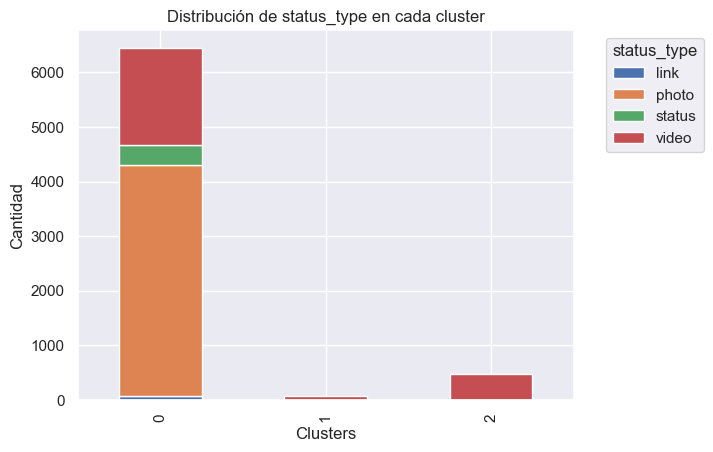

In [165]:
cluster_counts = facebook2.groupby(['clusters', 'status_type']).size().unstack()
cluster_counts.plot(kind='bar', stacked=True)
plt.title('Distribución de status_type en cada cluster')
plt.xlabel('Clusters')
plt.ylabel('Cantidad')
plt.legend(title='status_type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Vemos que:
- cluster 0, contiene para status_type, los 4 categorias que lo conforman. la mayoria de registros que contiene este cluster son photos y videos.
- cluster 1, contiene solo videos.
- cluster 2, contiene solo videos.

Podemos concluir que de los tres grupos que nos clasifico el modelo k-means, solo 1 grupo contiene las cuatro categorias de status_type, los otros dos grupos solo contiene videos y muy pocos registros.

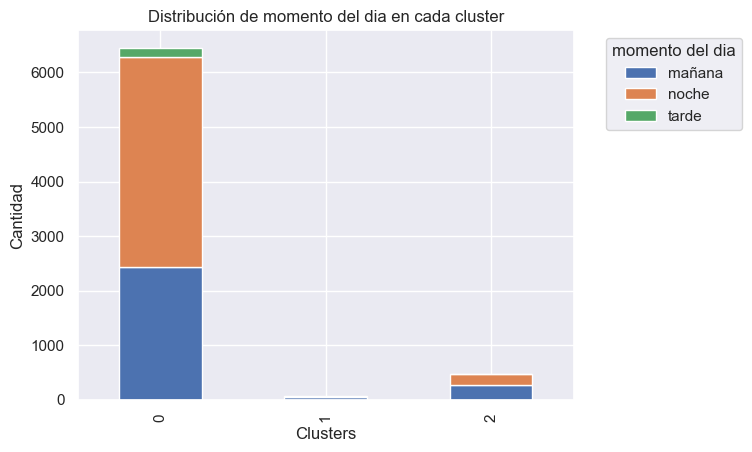

In [176]:
cluster_counts2 = facebook2.groupby(['clusters', 'momento del dia']).size().unstack()
cluster_counts2.plot(kind='bar', stacked=True)
plt.title('Distribución de momento del dia en cada cluster')
plt.xlabel('Clusters')
plt.ylabel('Cantidad')
plt.legend(title='momento del dia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Vemos que:
- cluster 0, contiene registros de los tres momentos del dia, mañana tarde y noche
- cluster 1, solo tiene mañana
- cluster 2, contiene mañana y noche

Podemos concluir que de los tres grupos que nos clasifico el modelo k-means, solo 1 grupo contiene las tres categorias momento del dia, los otros dos grupos solo contiene mañana o noche respectivamente.

In [192]:
estadistica=facebook2.groupby('clusters').describe().T.round(3)
pd.set_option('display.max_rows', None)
estadistica

clusters                    0          1         2
0                                                 
num_reactions count  6452.000     72.000   475.000
              mean    200.111    680.806   493.903
              std     439.332    416.030   512.669
              min       0.000    228.000    64.000
              25%      16.000    415.750   218.000
              50%      47.000    561.000   282.000
              75%     173.000    840.000   413.000
              max    4710.000   2399.000  4410.000
num_comments  count  6452.000     72.000   475.000
              mean     51.168   6760.403  1603.688
              std     154.746   3279.474  1012.785
              min       0.000   2257.000    18.000
              25%       0.000   4990.750   916.000
              50%       3.000   5979.000  1315.000
              75%      14.000   7528.750  1945.500
              max    1686.000  20990.000  4661.000
num_shares    count  6452.000     72.000   475.000
              mean     10.912    677.694   342.251
              std      35.315    519.874   187.443
              min       0.000     25.000    34.000
              25%       0.000    336.250   223.500
              50%       0.000    586.000   287.000
              75%       2.000    875.250   431.000
              max     295.000   3424.000  1618.000
num_likes     count  6452.000     72.000   475.000
              mean    194.509    517.653   372.996
              std     437.948    308.801   428.417
              min       0.000    138.000    54.000
              25%      15.000    329.250   143.000
              50%      46.000    449.500   193.000
              75%     154.250    615.000   309.000
              max    4710.000   1737.000  4315.000
num_loves     count  6452.000     72.000   475.000
              mean      4.529    139.375   105.242
              std      13.790    106.474    86.799
              min       0.000      5.000     6.000
              25%       0.000     56.750    51.000
              50%       0.000    111.500    83.000
              75%       2.000    198.000   123.000
              max     234.000    529.000   657.000
num_wows      count  6452.000     72.000   475.000
              mean      0.585     10.597     8.907
              std       2.191     29.830    29.109
              min       0.000      0.000     0.000
              25%       0.000      2.000     1.000
              50%       0.000      4.000     2.000
              75%       0.000      6.250     4.000
              max      65.000    206.000   278.000
num_hahas     count  6452.000     72.000   475.000
              mean      0.292      8.889     4.977
              std       2.329      6.379    11.049
              min       0.000      0.000     0.000
              25%       0.000      4.750     1.000
              50%       0.000      8.000     3.000
              75%       0.000     12.250     5.000
              max     102.000     43.000   157.000
num_sads      count  6452.000     72.000   475.000
              mean      0.140      3.056     1.059
              std       1.315      3.301     2.286
              min       0.000      0.000     0.000
              25%       0.000      1.000     0.000
              50%       0.000      2.000     0.000
              75%       0.000      3.250     1.000
              max      51.000     23.000    37.000
num_angrys    count  6452.000     72.000   475.000
              mean      0.053      1.236     0.722
              std       0.597      1.429     1.109
              min       0.000      0.000     0.000
              25%       0.000      0.000     0.000
              50%       0.000      1.000     0.000
              75%       0.000      2.000     1.000
              max      31.000      5.000     8.000

Decido ver estadisticamente cada grupo por cada variable, para encontrar patrones o saber el comportamiento de cada cluster y he encontrado lo siguiente: 
- Cluster 0: Siempre su minimo es 0.00 y num_comments, num_shares, num_loves, num_wows, num_hahas, num_sads, num_angrys, siempre tiene la desviacion estandar mas baja solo num_likes (mas alta), num_reactions (segunda mas alta).
- Cluster 1: Tiende a tener las desviaciaciones estandar mas altas y los minimos tienden a ser los mas altos 
- Cluster 2: Tiende a tener las desviaciones estandar intermedias y los minimos tienden a ser los segundo mas altos.

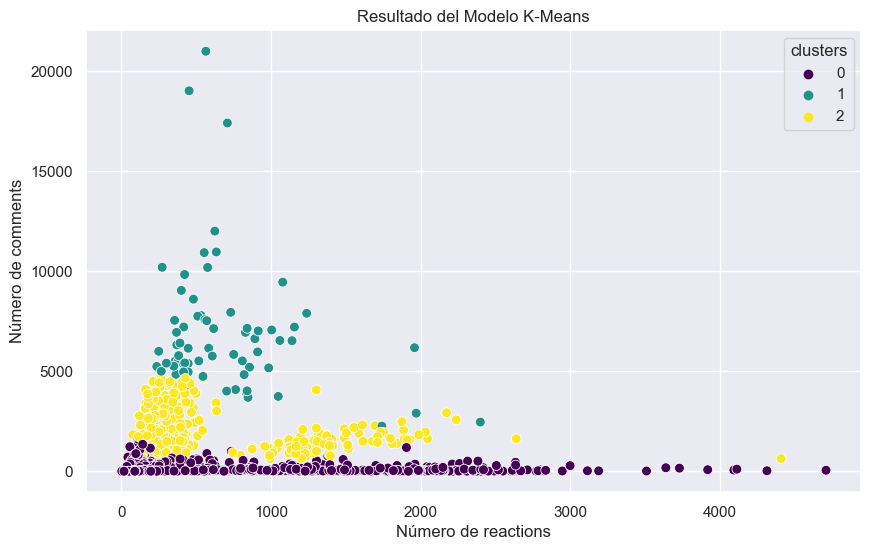

In [2541]:
plt.figure(figsize=(10, 6))

# Graficar puntos según los clústeres
sns.scatterplot(x='num_reactions', y='num_comments', hue='clusters', data=facebook2, palette='viridis', s=50, hue_order=facebook2['clusters'].unique())

# Añadir etiquetas y leyenda
plt.xlabel('Número de reactions')
plt.ylabel('Número de comments')
plt.title('Resultado del Modelo K-Means')
plt.savefig('Resultado K-means - comments - reactions.png')
plt.show()

En la grafica de dispersion, podemos identificar que se agrupan los registros en funcion de las caracteristicas (numero de reacciones y numero de comentarios). cada punto es una observacion definidos por los componentes (PC1, PC2, PC3) y los colores indican a que cluster pertenece  cada observacion segun la etiqueta.
- Cluster 1 (verde), tiene observaciones dispersas entre x y Y, trata de prevalecer la dispersión, hacia el eje y (numero de comments), su dispersión, no es lineal. su rango esta entre 2.500 y 20.000. aqui cuando hay comentarios, tambien pueden generar reacciones. 
- Cluster 2 (Amarillo), las observaciones tienen una dispersión compacta. con preferencia al eje X, sin embargo se mueve entre los dos ejes. su rango esta en 1.000 y 5.000. aqui cuando hay reacciones, podria generar comentarios.
- Cluster 0 (violeta), Las observaciones estan mas concentradas sobre el eje x (Numero de reations) y su dispersión se desarrolla sobre el mismo eje y es casi lineal. lo que significa que no hay relacion entre mayor numero de reacciones y aumento de comentarios su rango esta en 0 y 2.000. 

Los cluster 1 y 2 se relacionan mas entre si, para variabels num_reactions y num_comments, que el cluster 0.

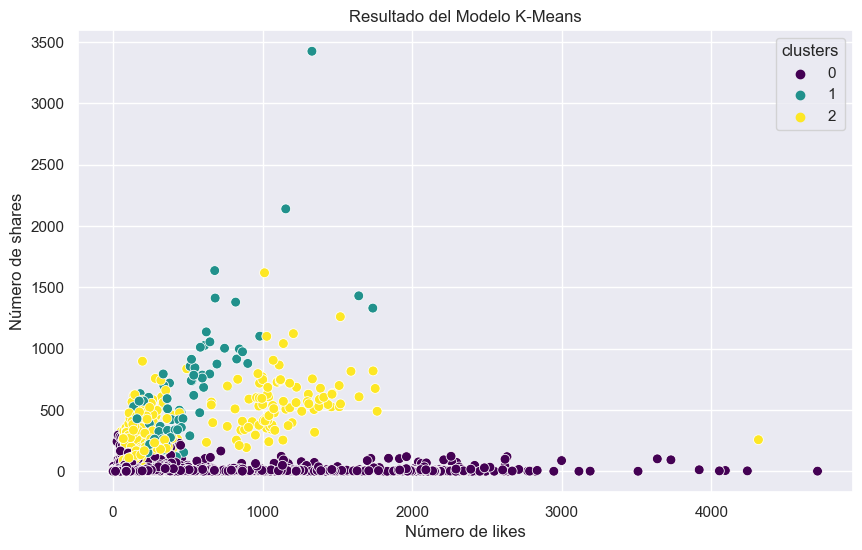

In [2547]:
plt.figure(figsize=(10, 6))

# Graficar puntos según los clústeres
sns.scatterplot(x='num_likes', y='num_shares', hue='clusters', data=facebook2, palette='viridis', s=50, hue_order=facebook2['clusters'].unique())

# Añadir etiquetas y leyenda
plt.xlabel('Número de likes')
plt.ylabel('Número de shares')
plt.title('Resultado del Modelo K-Means')
plt.savefig('Resultado K-means - shares - likes.png')
plt.show()

En esta grafica de dispersión, podemos observar que para num_shares y num_likes, se etiquetaron tres clusters:
- Cluster 0  (Violeta): tiene un comportamiento concentrado de sus puntos, en el eje x, su dispersion es lineal. es poca la interaccion entre las variabels num_likes y num_sheres, su rango es de 0 a 4.000.
- Cluster 1 (verde): tiene un comportamiento mas disperso.  vemos dispersiones mucho mas amplias y luego concentraciones de puntos. vemos que no es lineal su dispersion, se mueve en el eje x y Y. lo cual podria significar una relacion entre ambas variables num_likes y num_shares, su rango es de entre 0 y 3.500 
- Cluster 2 (Amarillo): tiene un comportamiento de los puntos disperso. vemos dispersiones variadas, unos puntos muy dispersos y otros concentrados. se mueve tanto en el eje x como en el Y. podria represnetar una relacion entre las dos variables, su rango es de entre 0 y 1.700.

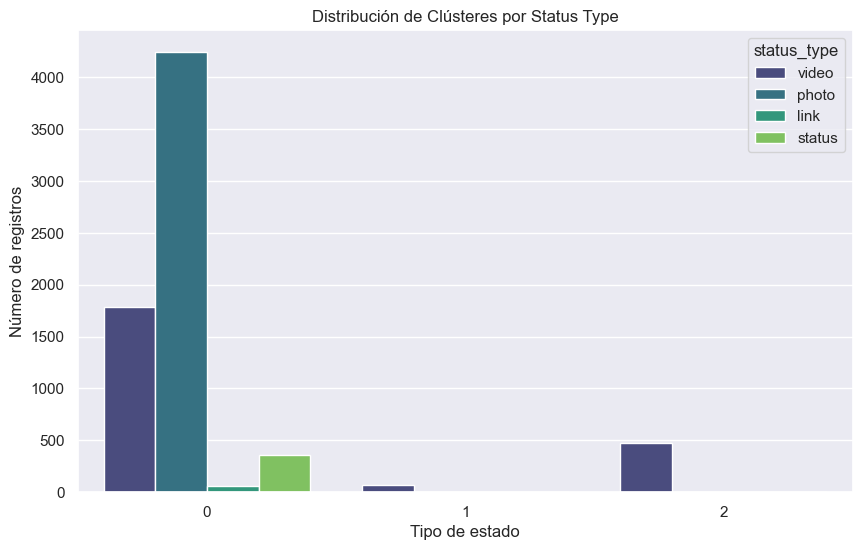

In [2552]:
plt.figure(figsize=(10, 6))

# Graficar un gráfico de barras
sns.countplot(x='clusters', hue='status_type', data=facebook2, palette='viridis')

# Añadir etiquetas y leyenda
plt.xlabel('Tipo de estado')
plt.ylabel('Número de registros')
plt.title('Distribución de Clústeres por Status Type')
plt.savefig('Distribucion de clusters por status type.png')
plt.show()

Ahora vemos como la columna status_type, se clasifica respecto a los clusters:

- Cluster 0: contiene en su mayoria fotos, luego videos, este cluster contiene los 4 tipos de contenido. 
- Cluster 1: contiene solo videos.
- Cluster 2: contiene solo videos.

El cluster 0 contiene todas las categorias. 

##### Ejercicio 2
Clasifica los distintos registros utilizando el algoritmo de clustering jerárquico.

In [207]:
facebook3=facebook2.copy()

In [208]:
facebook3=facebook2.drop("clusters",axis=1)

In [209]:
facebook3.head(5)

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,momento del dia
1,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0,mañana
2,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,noche
3,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0,mañana
4,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0,noche
5,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0,noche


#### MODELO cluster jerarquico 

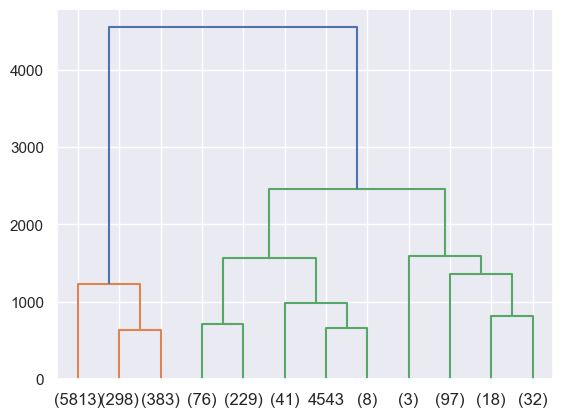

In [210]:
linkage_matrix = sch.linkage(fbk, method='ward')
clust_trun = 12
dendrograma = sch.dendrogram(linkage_matrix, truncate_mode='lastp', p=clust_trun)

plt.show()

Para el dendograma, Busco el nivel donde las uniones sean significativamente más largas y del mismo color, lo que indica que los clusters son menos similares entre sí. observo que el rango donde las uniones son mas largas es en el rango de entre 1300 y 4500, donde el dendograma se divide en 2, 3 y 5, sin embargo me guio po el color y quiero mantener solo 2 clusters. 

In [222]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# clustering jerarquico
agg_cl = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')

# ajustamos el modelo aglomerativo clusterizado al dataset
clustering = agg_cl.fit_predict(fbk)

# creamos nueva columna con el resultado del clustering
facebook3['Clusters_jerarquicos'] = clustering

facebook3.head(10)

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,momento del dia,Clusters_jerarquicos
1,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0,mañana,1
2,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,noche,1
3,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0,mañana,1
4,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0,noche,1
5,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0,noche,1
6,246675545449582_1645650162218773,photo,217,6,0,211,5,1,0,0,0,noche,1
7,246675545449582_1645564175560705,video,503,614,72,418,70,10,2,0,3,noche,1
8,246675545449582_1644824665634656,video,295,453,53,260,32,1,1,0,1,mañana,1
9,246675545449582_1644655795651543,photo,203,1,0,198,5,0,0,0,0,noche,1
10,246675545449582_1638788379571618,photo,170,9,1,167,3,0,0,0,0,noche,1


In [212]:
print(facebook3['Clusters_jerarquicos'].value_counts()) #principales aspectos del aglomerativo

1    6494
0     505
Name: Clusters_jerarquicos, dtype: int64


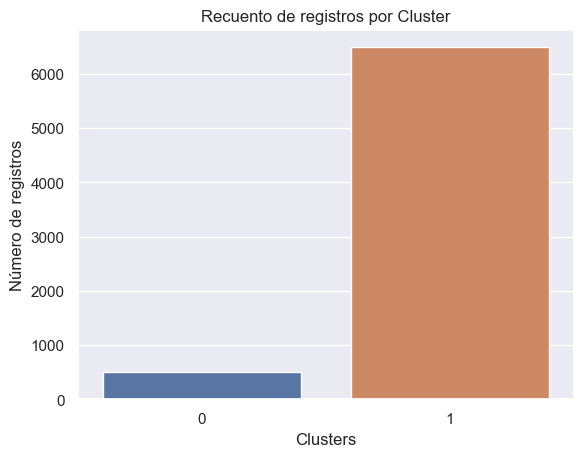

In [213]:
cluster2 = facebook3['Clusters_jerarquicos'].value_counts()

sns.barplot(x=cluster2.index, y=cluster2.values)
plt.xlabel('Clusters')
plt.ylabel('Número de registros')
plt.title('Recuento de registros por Cluster')
plt.savefig('Recuento de registros por clusters jerarquico.png')
plt.show()

Observamos que el cluster 1, tiene la mayor cantidad de registros, el cluster 0 tiene muchos menos registros. existe una gran diferencia de cantidades entre los dos clusters.

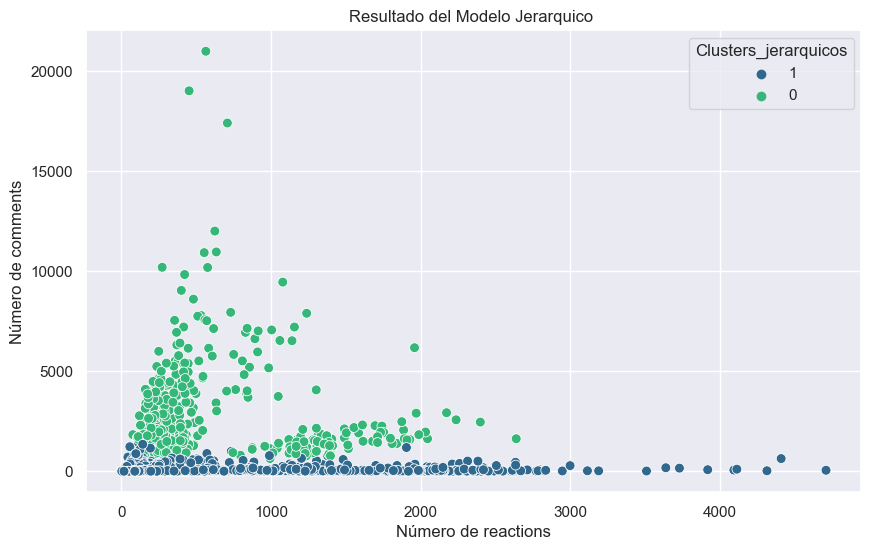

In [214]:
plt.figure(figsize=(10, 6))

# Graficar puntos según los clústeres
sns.scatterplot(x='num_reactions', y='num_comments', hue='Clusters_jerarquicos', data=facebook3, palette='viridis', s=50, hue_order=facebook3['Clusters_jerarquicos'].unique())

# Añadir etiquetas y leyenda
plt.xlabel('Número de reactions')
plt.ylabel('Número de comments')
plt.title('Resultado del Modelo Jerarquico ')
plt.savefig('Resultado Jerarquico - comments - reactions.png')
plt.show()

Se observa, como los puntos con una dispersión casi lineal, fueron agrupados en el cluster 1 y los puntos menos dispersos en el cluster 0. pero tambien nos indica que el cluster 1 tiene menos relacion entre variables num_reactions y num_comments, mientras que el cluster 0 si que tiene relacion entre las variables.

- Cluster 1 (azul), Las observaciones estan mas concentradas sobre el eje x (Numero de reations) y su dispersión se desarrolla sobre el mismo eje y es casi lineal. tiene poca relacion con la variabel num_comments.
- Cluster 0 (verde), tiene observaciones dispersas entre x y Y, prevalece la dispersión no lineal. puede significar una relación entre variables, a medida que aumenta en x algunos puntos tambien en y.

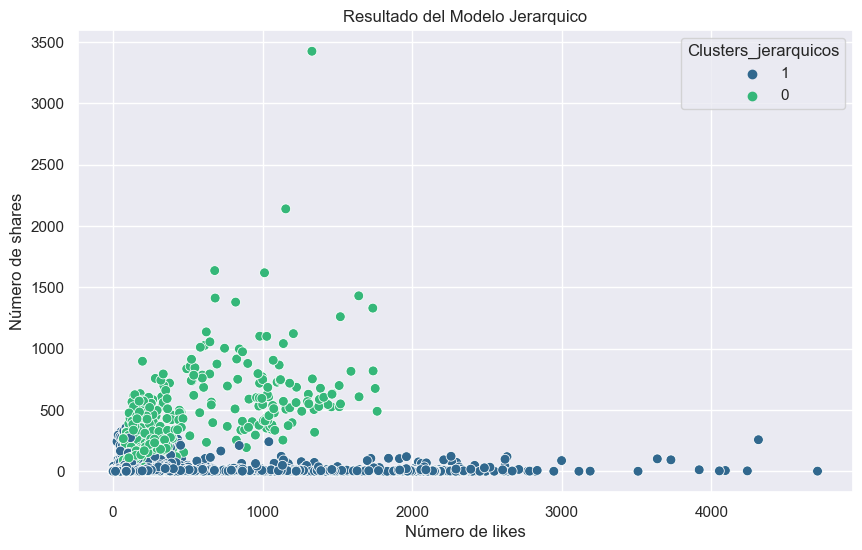

In [215]:
plt.figure(figsize=(10, 6))

# Graficar puntos según los clústeres
sns.scatterplot(x='num_likes', y='num_shares', hue='Clusters_jerarquicos', data=facebook3, palette='viridis', s=50, hue_order=facebook3['Clusters_jerarquicos'].unique())

# Añadir etiquetas y leyenda
plt.xlabel('Número de likes')
plt.ylabel('Número de shares')
plt.title('Resultado del Modelo Jerarquico')
plt.savefig('Resultado Jerarquico - shares - likes.png')
plt.show()

En esta grafica de dispersión, podemos observar que para num_shares y num_likes, se etiquetaron dos clusters:

- Cluster 1 (Azul): tiene un comportamiento concentrado de sus puntos y en el eje x, su dispersion tiende a ser lineal. aunque hay puntos con una dispersión, no lineal. esto significa que se relacionan poco las variables num_likes y num_shares.
- Cluster 0 (verde): tiene un comportamiento mas disperso. vemos dispersiones mucho mas amplias y luego concentraciones de puntos. vemos que no es lineal su dispersion, se mueve en el eje x y Y. por tanto puede significar una relacion entre variables. 


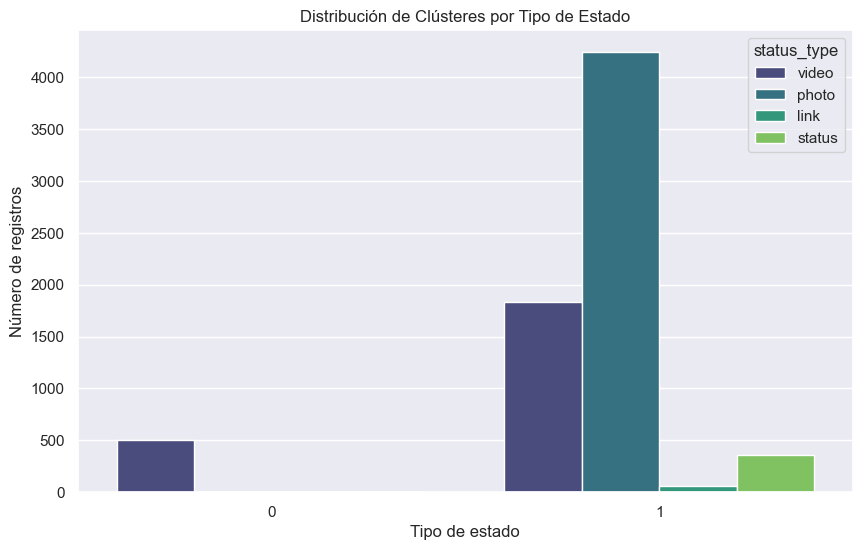

In [216]:
plt.figure(figsize=(10, 6))

# Graficar un gráfico de barras
sns.countplot(x='Clusters_jerarquicos', hue='status_type', data=facebook3, palette='viridis')

# Añadir etiquetas y leyenda
plt.xlabel('Tipo de estado')
plt.ylabel('Número de registros')
plt.title('Distribución de Clústeres por Tipo de Estado')
plt.savefig('Distribucion de clusters Jerarquicos por status type.png')
plt.show()

Ahora vemos como la columna status_type, se clasifica respecto a dos clusters:

- Cluster 0: contiene solo videos. 
- Cluster 1: contiene en su mayoria fotos, luego videos, este cluster contiene los 4 tipos de contenido.

##### COMPARACIÓN DE MODELOS

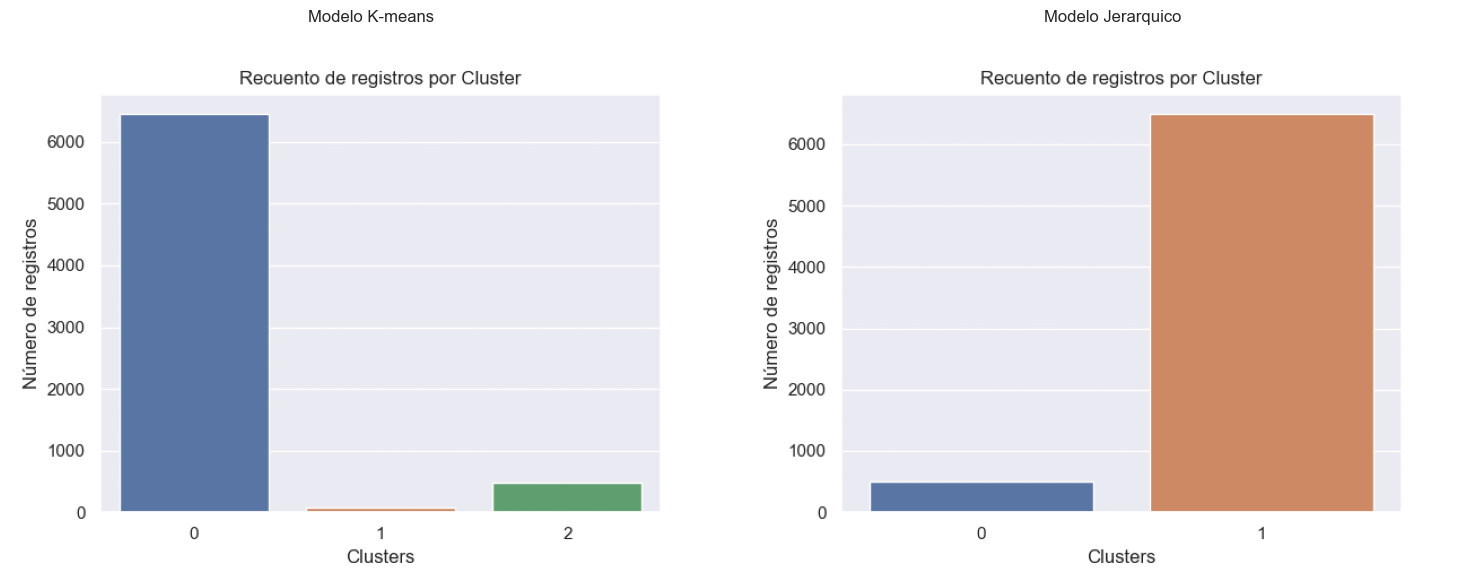

In [217]:
imagen1 = mpimg.imread('Recuento de registros por cluster K-means.png')
imagen2 = mpimg.imread('Recuento de registros por clusters jerarquico.png')

# Configurar la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 fila, 2 columnas

# Mostrar la primera gráfica en el primer subplot
axs[0].imshow(imagen1)
axs[0].axis('off') 
axs[0].set_title('Modelo K-means')

# Mostrar la segunda gráfica en el segundo subplot
axs[1].imshow(imagen2)
axs[1].axis('off')
axs[1].set_title('Modelo Jerarquico')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar la figura
plt.show()

In [220]:
print(facebook2['clusters'].value_counts()) #principales aspectos del k means
print(facebook3['Clusters_jerarquicos'].value_counts()) #principales aspectos del aglomerativo

0    6452
2     475
1      72
Name: clusters, dtype: int64
1    6494
0     505
Name: Clusters_jerarquicos, dtype: int64


En esta comparacion de graficas de barras, podemos ver  3 clusters para k-means y para Modelo jerarquico, dos grupos, al pasar de tres clusters a dos, vemos que un cluster es repartido entre los otros dos en el modelo jerarquico. 30 registros se fueron al cluster mas pequeño y 42 registros se fueron al cluster mas grande.

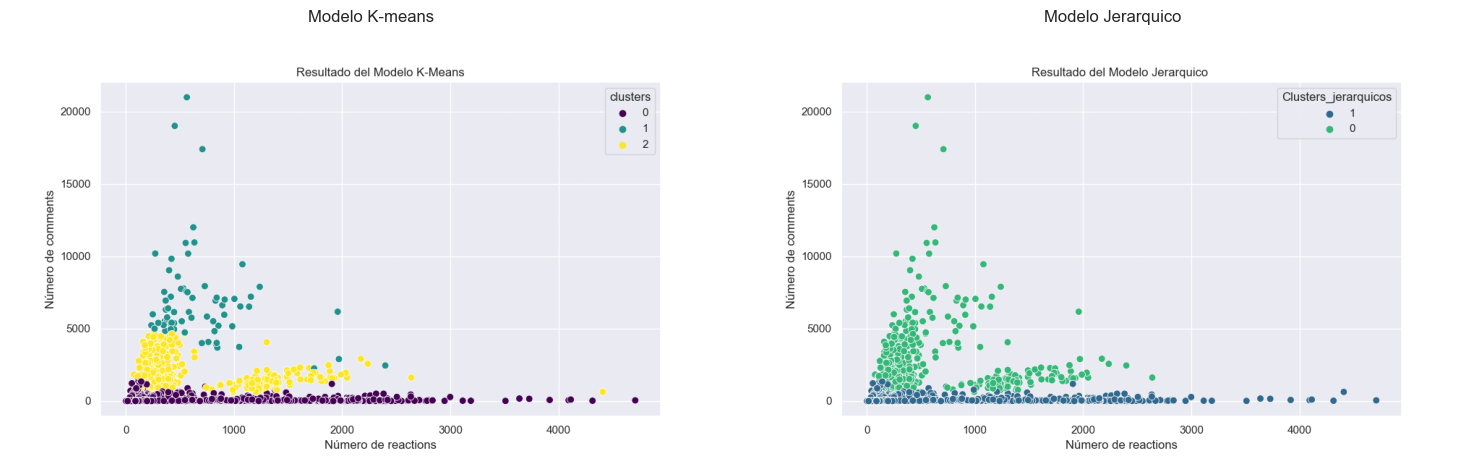

In [2551]:
imagen3 = mpimg.imread('Resultado K-means - comments - reactions.png')
imagen4 = mpimg.imread('Resultado Jerarquico - comments - reactions.png')

# Configurar la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 fila, 2 columnas

# Mostrar la primera gráfica en el primer subplot
axs[0].imshow(imagen3)
axs[0].axis('off') 
axs[0].set_title('Modelo K-means')

# Mostrar la segunda gráfica en el segundo subplot
axs[1].imshow(imagen4)
axs[1].axis('off')
axs[1].set_title('Modelo Jerarquico')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar la figura
plt.show()

Para Num_comments y Num_reactions, podemos observar en ambas graficas que, los puntos son los mismos, lo unico que cambian son los clusters, k-means 3 clusters, Jeraquico 2 clusters.

Un cluster predomina con el numero de registros ( color violeta en kmeans (cluster 0) y azul en Jeraquico (cluster 1) ) que son los clusters que contiene la mayoria de registros, un grupo desaparecio de un modelo a otro. como analizamos anteriormente, el grupo que desaparecio se repartio 30 - 42 a los demas clusters respectivamente. eso se evidencia en las graficas, visualmente pareciera que los clusters 1 y 2 se fucionaran de k-means a jerarquico, pero luego vemos detalles de algunos puntos amarillos en k-means, que se volvieron azules en el jerarquico. la fusion entre azul y amarillo, es mas evidente graficamente que la violeta - amarillo.  sin embargo como vimos anteriomente fueron la mayoria de registros (42), los que se fueron al grupo azul. 

por tanto podemos decir que para ambos modelos los cluster mas estables y que contiene el mayor numero de registros son los representados por el color violeta en k-means y azul en el modelo jerarquico.  sin embargo prevalece el siempre 1 cluster que es el que contiene la mayoria de registros en ambos modelos.

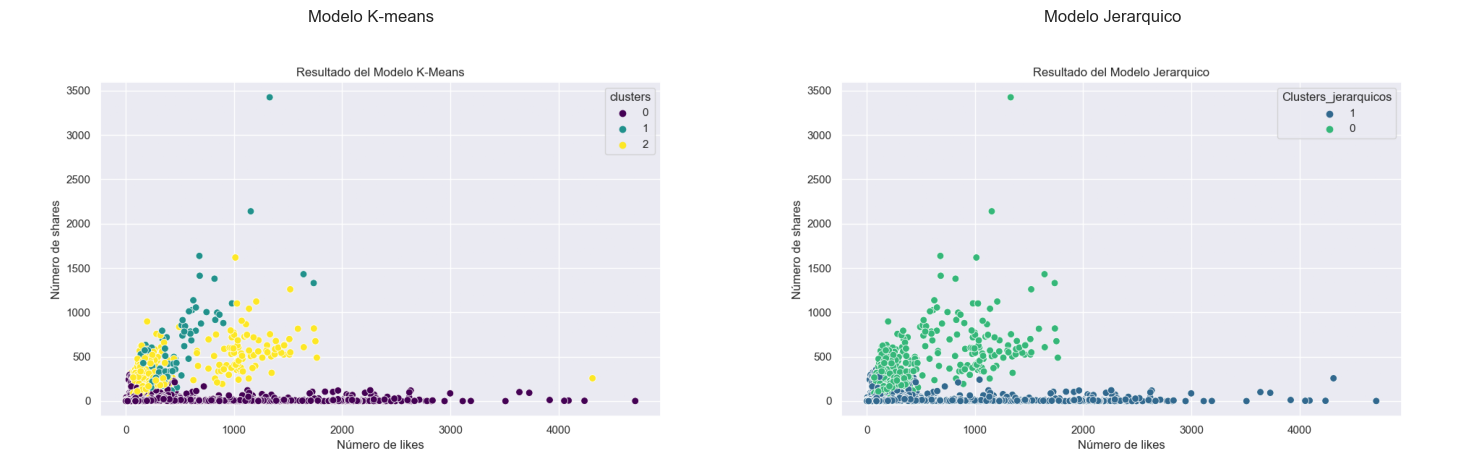

In [2550]:
imagen5 = mpimg.imread('Resultado K-means - shares - likes.png')
imagen6 = mpimg.imread('Resultado Jerarquico - shares - likes.png')

# Configurar la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 fila, 2 columnas

# Mostrar la primera gráfica en el primer subplot
axs[0].imshow(imagen5)
axs[0].axis('off') 
axs[0].set_title('Modelo K-means')

# Mostrar la segunda gráfica en el segundo subplot
axs[1].imshow(imagen6)
axs[1].axis('off')
axs[1].set_title('Modelo Jerarquico')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar la figura
plt.show()

Para Num_shares y Num_likes, podemos observar en ambas graficas que, los puntos son los mismos, lo unico que cambian son los clusters, k-means 3 clusters, Jeraquico 2 clusters.

Un cluster predomina con el numero de registros ( color violeta en kmeans y azul en Jeraquico ) que es el cluster que contiene la mayoria de registros, un grupo desaparecio de un modelo a otro y ha pasado lo mismo que en con las varialbes anteriores, el cluster que desaparecio, se fusiono al los otros dos 30 - 42 respectivamente.

por tanto podemos decir que para ambos modelos, los cluster mas estables y que contiene el mayor numero de registros, son los representados por el color violeta y azul, respectivamente. 

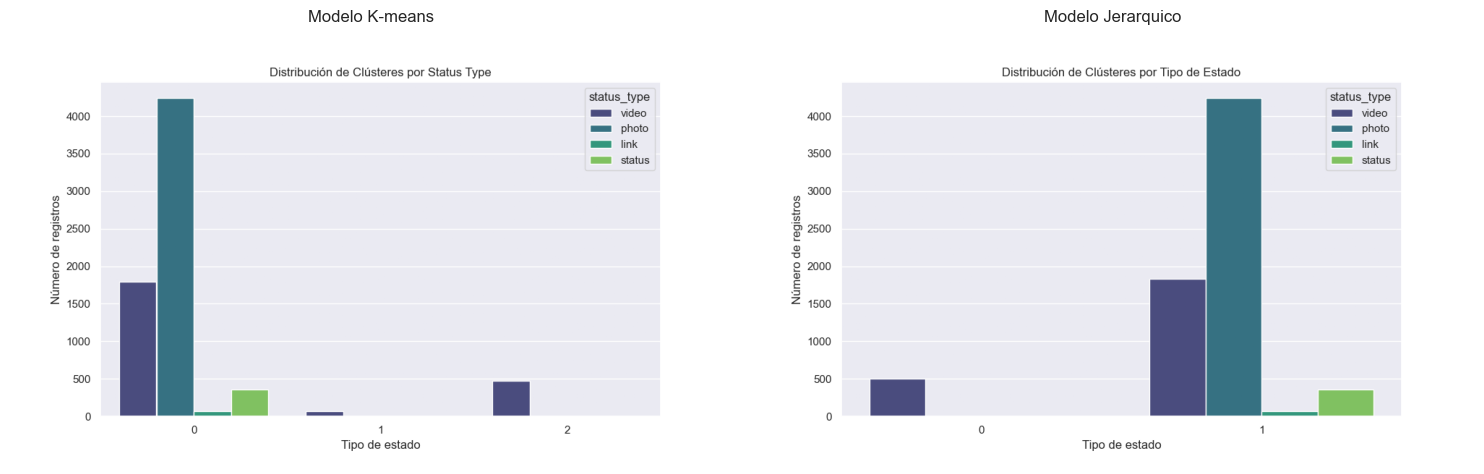

In [2554]:
imagen7 = mpimg.imread('Distribucion de clusters por status type.png')
imagen8 = mpimg.imread('Distribucion de clusters Jerarquicos por status type.png')

# Configurar la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 fila, 2 columnas

# Mostrar la primera gráfica en el primer subplot
axs[0].imshow(imagen7)
axs[0].axis('off') 
axs[0].set_title('Modelo K-means')

# Mostrar la segunda gráfica en el segundo subplot
axs[1].imshow(imagen8)
axs[1].axis('off')
axs[1].set_title('Modelo Jerarquico')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar la figura
plt.show()

Para Status_type, el modelo K-means, genero tres clusters, mientras que el jerarquico hizo dos grupos, para esta variable podemos ver, más claramente que el cluster que desaparecio de tener tres en el kmeans y dos en el jerarquico, se fusiono a los dos clusters 30 a cluster 0 y 42 al cluster 1.

#### Ejercicio 3
##### Calcula el rendimiento del clustering mediante un parámetro como puede ser silueta.


La métrica de silueta es una medida que evalúa cuán bien separados están los clusters en un conjunto de datos. Proporciona una indicación de la cohesión intra-cluster y la separación inter-cluster. La métrica de silueta se calcula para cada punto de datos y proporciona un valor entre -1 y 1.

La silueta global para todos los puntos en el conjunto de datos se obtiene tomando el promedio de las siluetas individuales. Una silueta global más alta sugiere una mejor separación y cohesión entre clusters.

In [221]:
silhouette_kmeans = silhouette_score(fbk, kmeans_model.labels_)
silhouette_hierarchical = silhouette_score(fbk, clustering)

print(f"Silueta global de KMeans: {silhouette_kmeans}")
print(f"Silueta global del modelo jerárquico: {silhouette_hierarchical}")

Silueta global de KMeans: 0.8661066222496663
Silueta global del modelo jerárquico: 0.8709887708937093


Si observamos los resultado de la metrica silueta, podemos destacar que para ambos modelos, se tuvieron puntuaciones buenas de su rendimiento, lo que significa que la clusterizacion para cada grupo fue efectiva. 

Si comparamos ambos modelos, el modelo jerarquico para nuestro caso fue el mejor modelo, con un puntaje de 0.87, donde 1.0 seria el que mas se ajusta a una mayor separación y cohesión entre clusters. 

Por tanto podemos concluir que para nuestro caso, la mejor clusterización fue para dos clusters, ya que contiene las mejor separación y cohesión.